# Demo 6: Investigating the focus finder

In this demo, we set up an experiment to see how well the focus finder works.
We do this by generating hundred random realisations of:
- a paraboloid,
- an ellipsoid with "orient" set to "z",
- an ellipsoid with "orient" set to "x".

For each of the hundred different realisations for each reflector, we record the difference between the actual and the found focus and check this.

Finding focii for paraboloids...
i = 0
i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90
Finding focii for ellipsoids oriented along z...
i = 0
i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90
Finding focii for ellipsoids oriented along x...
i = 0
i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90


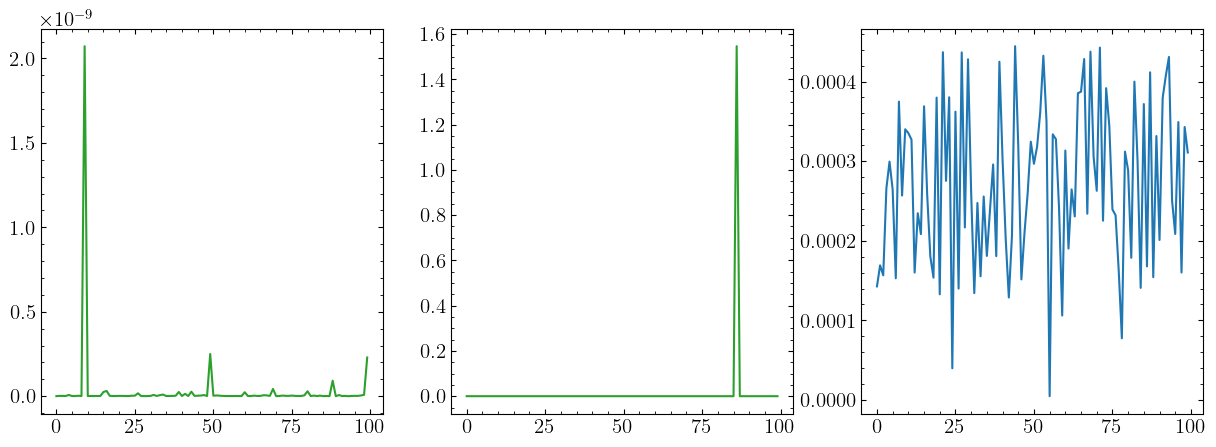

In [3]:
#%matplotlib notebook # Uncomment for interactive plots when running the notebook!
import numpy as np
import random

from PyPO.System import System

import matplotlib.pyplot as pt

def getRandomParabola():
    s = System(verbose=False)

    TubeRTDict = {
            "name"      : "start",
            "nRays"     : 10,
            "nRing"     : 10,
            "angx0"     : 0,
            "angy0"     : 0,
            "x0"        : 1,
            "y0"        : 1
            }

    s.createTubeFrame(TubeRTDict)

    focus = np.array([0, 0, random.uniform(0,10)])

    parabola = {
            "name"      : "parabola",
            "gmode"     : "uv",
            "pmode"     : "focus",
            "focus_1"   : focus,
            "vertex"    : np.zeros(3),
            "lims_u"    : np.array([0, 1]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([101, 101])
            }

    s.addParabola(parabola)
    s.translateGrids("start", focus, obj="frame")
    
    return s

def getRandomEllipse(orient):
    s = System(verbose=False)

    TubeRTDict = {
            "name"      : "start",
            "nRays"     : 10,
            "nRing"     : 10,
            "angx0"     : 5,
            "angy0"     : 5,
            "x0"        : 0,
            "y0"        : 0
            }

    s.createTubeFrame(TubeRTDict)

    if orient == "z":
        focus1 = np.array([0, 0, random.uniform(0,1)])
    else:
        focus1 = np.array([random.uniform(0,1), 0, 0])

    focus2 = -focus1 

    ellipse = {
            "name"      : "ellipse",
            "gmode"     : "uv",
            "pmode"     : "focus",
            "orient"    : orient,        
            "flip"      : True,
            "focus_1"   : focus1,
            "focus_2"   : focus2,
            "ecc"       : random.uniform(0.4, 0.7),
            "lims_u"    : np.array([0, 1]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([101, 101])
            }

    s.addEllipse(ellipse)

    s.translateGrids("start", focus1, obj="frame")
    
    return s

# We run the random paraboloids first.
runRTDict = {
        "fr_in"     : "start",
        "fr_out"    : "fr_par",
        "t_name"    : "parabola",
        "tol"       : 1e-12,
        "device"    : "CPU"
        }

diff_par = []
print("Finding focii for paraboloids...")
for i in range(100):
    if i % 10 == 0:
        print(f"{i = }")
    s = getRandomParabola()
    
    distance = np.absolute(s.system["parabola"]["focus_1"] - s.system["parabola"]["vertex"])

    s.runRayTracer(runRTDict)
    foc_find = s.findRTfocus("fr_par")
    
    diff_rel = np.linalg.norm(s.system["parabola"]["focus_1"] - foc_find) / distance
    diff_par.append(diff_rel)

    del s

# Then we run the ellipsoids oriented along the z axis.
runRTDict = {
        "fr_in"     : "start",
        "fr_out"    : "fr_ell",
        "t_name"    : "ellipse",
        "tol"       : 1e-12,
        "device"    : "CPU"
        }

diff_ell_z = []

print("Finding focii for ellipsoids oriented along z...")
for i in range(100):
    if i % 10 == 0:
        print(f"{i = }")
    s = getRandomEllipse("z")
    
    distance = np.absolute(s.system["ellipse"]["focus_1"] - s.system["ellipse"]["focus_2"])

    s.runRayTracer(runRTDict)
    foc_find = s.findRTfocus("fr_ell")

    diff_rel = np.linalg.norm(s.system["ellipse"]["focus_2"] - foc_find) / distance
    diff_ell_z.append(diff_rel)

    del s

# Then we run the ellipsoids oriented along the x axis.
runRTDict = {
            "fr_in"     : "start",
            "fr_out"    : "fr_ell",
            "t_name"    : "ellipse",
            "tol"       : 1e-12,
            "device"    : "CPU"
            }

diff_ell_x = []

print("Finding focii for ellipsoids oriented along x...")
for i in range(100):
    if i % 10 == 0:
        print(f"{i = }")
    s = getRandomEllipse("x")
    
    distance = np.absolute(s.system["ellipse"]["focus_1"] - s.system["ellipse"]["focus_2"])

    s.runRayTracer(runRTDict)
    foc_find = s.findRTfocus("fr_ell")

    diff_rel = np.linalg.norm(s.system["ellipse"]["focus_2"] - foc_find) / distance
    diff_ell_x.append(diff_rel)

    del s

fig, ax = pt.subplots(1,3, figsize=(15,5))
ax[0].plot(diff_par)

ax[1].plot(diff_ell_z)

ax[2].plot(diff_ell_x)
pt.show()